### Pregunta de Negoci - Analistes del Perfil del Client:

> Quins són els perfils demogràfics que mostren més propensió a
contractar productes financers?
>

### Llibreries i càrrega de dades

In [105]:
"""Libreries que poden ser necessàries"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"
from plottable import Table         # Visualización de tablas
import matplotlib.colors as mcolors # Colores y mapas de colores


In [106]:
pip install plottable

Note: you may need to restart the kernel to use updated packages.


In [107]:
df = pd.read_csv("../Data/df_250519.csv")

Paleta de colors

In [108]:
custom_palette = ["#AABBC8", "#2CCED1", "#5F6F81", "#DCE3EA", "#2E2F36"]  
sns.set_palette(sns.color_palette(custom_palette))

### Extracte KPIs

In [109]:

# Variables 
contactados   = df.nunique().id                                     # Número total de clientes contactados
suscribieron  = df[df['deposit'] == True].nunique().id             # Número de clientes que suscribieron 
duracion_llam = df[df['deposit'] == True].duration.sum()           # Duración de llamadas a suscriptores
llam_telf = df[df['contact'] == 'telephone']['campaign'].sum()      # Número de llamadas realizadas por teléfono
llam_cell = df[df['contact'] == 'cellular']['campaign'].sum()       # Número de llamadas realizadas por movil
llam = df['campaign'].sum()                                         # Número total de llamadas
contatos_previos_sus = df[df['deposit'] == True]['previous'].sum() # Número de contactos previos a suscriptores
suscribieron_por_mes = df[df['deposit'] == True].groupby('month').count()['deposit']  # Suscriptores en el mes
contactos_por_mes = df.groupby('month').count()['deposit']          # clientes contactados en el mes      
conversion_por_mes = suscribieron_por_mes / contactos_por_mes       # conversión por mes


# Prints
print("El número total de clientes contactados es:",contactados)
print("El número de suscriptores es:",suscribieron)
print("La duración total de las llamadas a suscriptores es:",duracion_llam)
print("El número de llamadas realizadas a teléfono fijo es: ", llam_telf)
print("El número de llamadas realizadas a móvil es: ", llam_cell)
print("El número total de llamadas realizadas es: ", llam)
print("El número total de contactos previos de los suscriptores es:", contatos_previos_sus)
print("La conversión por mes es: ", conversion_por_mes)

El número total de clientes contactados es: 16163
El número de suscriptores es: 7712
La duración total de las llamadas a suscriptores es: 4161406
El número de llamadas realizadas a teléfono fijo es:  3274
El número de llamadas realizadas a móvil es:  28002
El número total de llamadas realizadas es:  40513
El número total de contactos previos de los suscriptores es: 9149
La conversión por mes es:  month
Apr    0.632210
Aug    0.456830
Dec    0.910256
Feb    0.579892
Jan    0.408537
Jul    0.413684
Jun    0.447770
Mar    0.903704
May    0.334953
Nov    0.420236
Oct    0.837500
Sep    0.842333
Name: deposit, dtype: float64


In [110]:
#KPIs
kpi1 = suscribieron/contactados          # porcentaje de conversión a depósito
kpi2 = duracion_llam/suscribieron        # promedio de duración de llamadas a suscriptores
kpi3_tel = llam_telf/llam                # porcentaje de llamadas a teléfono
kpi3_cell = llam_cell/llam               # porcentaje de llamadas a móvil
kpi3 = (llam_telf+llam_cell)/llam        # porcentaje de llamadas a teléfono o móvil
kpi4 = contatos_previos_sus/suscribieron # promedio de contactos previos a suscriptores
kpi5 = conversion_por_mes.idxmax()       # mes con mayor tasa de conversión
kpi5_tasa = conversion_por_mes.max()     # tasa de conversión del mes con mayor tasa de conversión




# Prints
print("KPI 1: El porcentaje de conversión a depósito es ",kpi1*100,"%")
print("KPI 2: La duración media de las llamadas a suscriptoreses",kpi2)
print("KPI 3: El porcentaje de llamadas realizadas por teléfono o móvil es ",kpi3*100,"%")
print("KPI 4: El porcentaje de contactos previos a suscriptores es ",kpi4)
print("KPI 5: El mes amb millor conversió ha sigut", kpi5, "amb una taxa de conversió de", kpi5_tasa)

KPI 1: El porcentaje de conversión a depósito es  47.713914496071276 %
KPI 2: La duración media de las llamadas a suscriptoreses 539.6014004149378
KPI 3: El porcentaje de llamadas realizadas por teléfono o móvil es  77.1999111396342 %
KPI 4: El porcentaje de contactos previos a suscriptores es  1.1863329875518671
KPI 5: El mes amb millor conversió ha sigut Dec amb una taxa de conversió de 0.9102564102564102


# Anàlisi Roser

Aquesta taula ve de l'informe anterior, només li hem hem canviat la taxa a percentatge

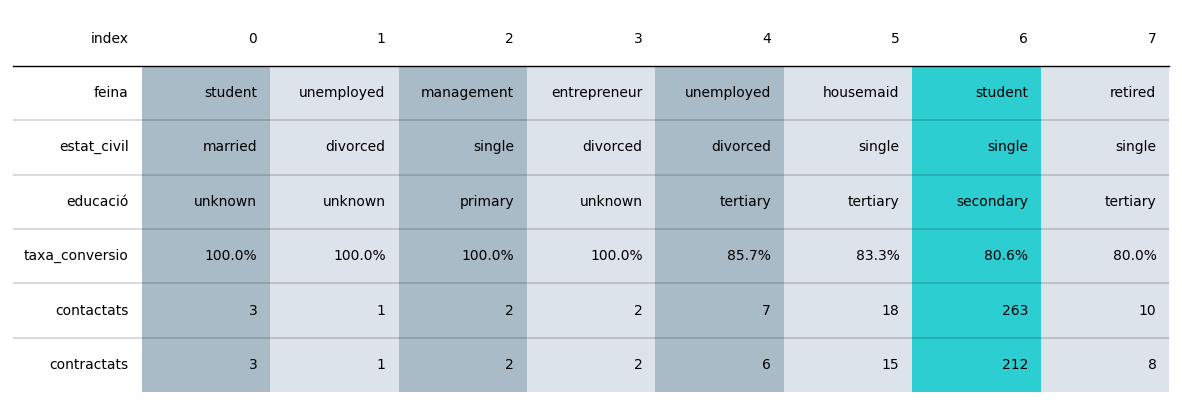

In [111]:
# Agrupem el dataframe per la combinació de les característiques demogràfiques 
df_agrupat_pc = df.groupby(['job', 'marital', 'education'])


# Creem una taula per al càlcul de conversions
taula_conversio_pc = []

# Recorrem la taula calculant la conversió de cada grup
for (feina, estat_civil, educacio), grup in df_agrupat_pc:
    contactats = grup.nunique().id
    contractats = grup[grup['deposit'] == True].nunique().id
    conversio = contractats / contactats if contactats != 0 else 0

    # Afegim cada resultat a la taula
    taula_conversio_pc.append({
        'feina': feina,
        'estat_civil': estat_civil,
        'educació': educacio,
        'contactats': contactats,
        'contractats': contractats,
        'taxa_conversio': conversio
    })

# Convertim la taula de conversió en un dataframe 
df_conversio_pc = pd.DataFrame(taula_conversio_pc)

# Ordenem el dataframe per la taxa de conversió de major a menor
resultats_ordenats = df_conversio_pc.sort_values(by='taxa_conversio', ascending=False)

# Arrodonim la taxa de conversió a 3 decimals
resultats_ordenats['taxa_conversio'] = resultats_ordenats['taxa_conversio'].round(3)

# Reiniciem l'index
resultats_ordenats = resultats_ordenats.reset_index()
resultats_ordenats = resultats_ordenats.drop(columns=['index'])


# Fer còpia del top 8 i seleccionar columnes
top8_resultats_ordenats = resultats_ordenats.head(8).copy()

# Convertir taxa de conversió a percentatge (amb 1 decimal)
top8_resultats_ordenats['taxa_conversio'] = (top8_resultats_ordenats['taxa_conversio'] * 100).round(1).astype(str) + '%'

top8_resultats_ordenats = top8_resultats_ordenats[[
    'feina', 'estat_civil', 'educació', 'taxa_conversio', 'contactats', 'contractats'
]]


# Reordenar columnes si cal
top8_resultats_ordenats = top8_resultats_ordenats[[
    'feina', 'estat_civil', 'educació', 'taxa_conversio', 'contactats', 'contractats'
]]


# Transposar per visualització
top8_resultats_ordenats = top8_resultats_ordenats.transpose()

# Mostrar taula 
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    top8_resultats_ordenats,
)

# Modifiquem manualment els colors de les columnes
tab.columns[0].set_facecolor('#AABBC8')
tab.columns[1].set_facecolor('#DCE3EA')
tab.columns[2].set_facecolor('#AABBC8')
tab.columns[3].set_facecolor('#DCE3EA')
tab.columns[4].set_facecolor('#AABBC8')
tab.columns[5].set_facecolor('#DCE3EA')
tab.columns[6].set_facecolor('#2CCED1')
tab.columns[7].set_facecolor('#DCE3EA')


plt.show()


Ara li volem afegir a cada perfil, la probabilitat de tenir una hipoteca o un altre tipus de prèstec

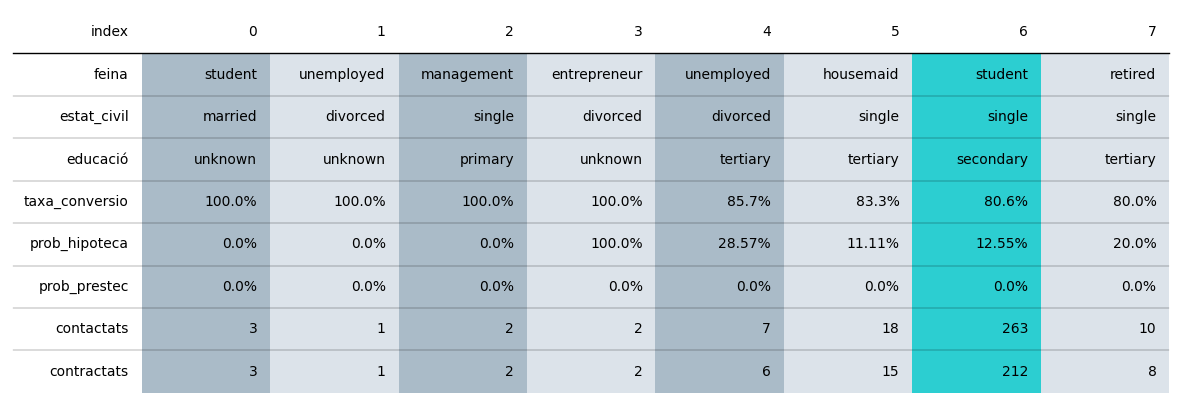

In [112]:
# Agrupem el dataframe per la combinació de les característiques demogràfiques 
df_agrupat_pc = df.groupby(['job', 'marital', 'education'])


# Creem una taula per al càlcul de conversions
taula_conversio_pc = []

# Recorrem la taula calculant la conversió i altres mètriques de cada grup
for (feina, estat_civil, educacio), grup in df_agrupat_pc:
    contactats = grup.nunique().id
    contractats = grup[grup['deposit'] == True].nunique().id
    conversio = contractats / contactats if contactats != 0 else 0
    prob_hipoteca = grup['housing'].mean()  # True=1, False=0 → mitjana = proporció
    prob_prestec = grup['loan'].mean()

    # Afegim cada resultat a la taula
    taula_conversio_pc.append({
        'feina': feina,
        'estat_civil': estat_civil,
        'educació': educacio,
        'contactats': contactats,
        'contractats': contractats,
        'taxa_conversio': conversio,
        'prob_hipoteca': prob_hipoteca,
        'prob_prestec': prob_prestec
    })

# Convertim la taula de conversió en un dataframe 
df_conversio_pc = pd.DataFrame(taula_conversio_pc)

# Ordenem el dataframe per la taxa de conversió de major a menor
resultats_ordenats = df_conversio_pc.sort_values(by='taxa_conversio', ascending=False)

# Arrodonim la taxa de conversió a 3 decimals
resultats_ordenats['taxa_conversio'] = resultats_ordenats['taxa_conversio'].round(3)

# Reiniciem l'index
resultats_ordenats = resultats_ordenats.reset_index()
resultats_ordenats = resultats_ordenats.drop(columns=['index'])


# Fer còpia del top 8 i seleccionar columnes
top8_resultats_ordenats = resultats_ordenats.head(8).copy()

# Convertir les proporcions i la conversió a percentatge amb 1 decimal
top8_resultats_ordenats['taxa_conversio'] = (top8_resultats_ordenats['taxa_conversio'] * 100).round(2).astype(str) + '%'
top8_resultats_ordenats['prob_hipoteca'] = (top8_resultats_ordenats['prob_hipoteca'] * 100).round(2).astype(str) + '%'
top8_resultats_ordenats['prob_prestec'] = (top8_resultats_ordenats['prob_prestec'] * 100).round(2).astype(str) + '%'


# Reordenar columnes si cal
top8_resultats_ordenats = top8_resultats_ordenats[[
    'feina', 'estat_civil', 'educació', 'taxa_conversio','prob_hipoteca', 'prob_prestec', 'contactats', 'contractats'
]]



# Transposar per visualització
top8_resultats_ordenats = top8_resultats_ordenats.transpose()

# Mostrar taula 
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    top8_resultats_ordenats,
)

# Modifiquem manualment els colors de les columnes
tab.columns[0].set_facecolor('#AABBC8')
tab.columns[1].set_facecolor('#DCE3EA')
tab.columns[2].set_facecolor('#AABBC8')
tab.columns[3].set_facecolor('#DCE3EA')
tab.columns[4].set_facecolor('#AABBC8')
tab.columns[5].set_facecolor('#DCE3EA')
tab.columns[6].set_facecolor('#2CCED1')
tab.columns[7].set_facecolor('#DCE3EA')


plt.show()
